<a href="https://colab.research.google.com/github/kamalrajugambli/KamalRaju_INFO5731_SPRING2022/blob/main/In_class_exercise_04_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/29/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
#importing required packages
import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy

!pip install pyldavis
import pyLDAvis
import gensim
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)



     |████████████████████████████████| 1.7 MB 13.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=0a01e59baef711c0c7484485fdf343d7ba8f4fe6ecce9d28b2b5349a2d0cc6bf
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
data1=pd.read_csv("/content/cleandata_list.csv")
data = data1.Content.values.tolist()
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

#Old Column data
print(data1["Content"][1])

#New column data
print(data[1])


"... The concept of maximum entropy can be traced back along multiple threads to/ nitish@gmail.com  Biblical times. Only recently, however, have computers become powerful enough to permit the widescale application of this concept to real world problems in statistical estimation and pattern recognition. In this paper we des ..."
"... The concept of maximum entropy can be traced back along multiple threads to/ Biblical times. Only recently, however, have computers become powerful enough to permit the widescale application of this concept to real world problems in statistical estimation and pattern recognition. In this paper we des ..."


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

data_words = list(sent_to_words(data))

print(data_words[1])

['the', 'concept', 'of', 'maximum', 'entropy', 'can', 'be', 'traced', 'back', 'along', 'multiple', 'threads', 'to', 'biblical', 'times', 'only', 'recently', 'however', 'have', 'computers', 'become', 'powerful', 'enough', 'to', 'permit', 'the', 'widescale', 'application', 'of', 'this', 'concept', 'to', 'real', 'world', 'problems', 'in', 'statistical', 'estimation', 'and', 'pattern', 'recognition', 'in', 'this', 'paper', 'we', 'des']


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['the', 'concept', 'of', 'maximum', 'entropy', 'can', 'be', 'traced', 'back', 'along', 'multiple', 'threads', 'to', 'biblical', 'times', 'only', 'recently', 'however', 'have', 'computers', 'become', 'powerful', 'enough', 'to', 'permit', 'the', 'widescale', 'application', 'of', 'this', 'concept', 'to', 'real', 'world', 'problems', 'in', 'statistical', 'estimation', 'and', 'pattern', 'recognition', 'in', 'this', 'paper', 'we', 'des']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
Clean_data = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(Clean_data[1])

NameError: ignored

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(Clean_data)

# Create Corpus
texts = Clean_data

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[1])

In [ ]:
id2word[0]

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:

print('\nPerplexity: ', lda_model.log_perplexity(corpus))  


coherence_model_lda = CoherenceModel(model=lda_model, texts=Clean_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [29]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles





In [ ]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix


In [ ]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [ ]:
start,stop,step=2,12,1
plot_graph(Clean_data,start,stop,step)

In [34]:
# LSA Model
number_of_topics=9
words=10
document_list,titles=load_data("/content/","cleandata_list.csv")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 101
[(0, '0.619*"languag" + 0.500*"natur" + 0.356*"process" + 0.153*"semant" + 0.105*"human" + 0.100*"use" + 0.100*"way" + 0.082*"sens" + 0.082*"broad" + 0.079*"one"'), (1, '-0.380*"linguist" + -0.268*"nlp" + -0.247*"cooper" + -0.215*"paper" + -0.209*"applic" + -0.171*"concept" + 0.170*"human" + -0.152*"one" + 0.142*"use" + 0.141*"face"'), (2, '-0.247*"semant" + -0.241*"task" + 0.212*"one" + -0.208*"recognit" + 0.198*"nlp" + 0.177*"way" + -0.168*"includ" + -0.168*"speech" + -0.166*"process" + 0.165*"linguist"'), (3, '0.290*"concept" + 0.169*"recent" + 0.159*"comput" + -0.156*"linguist" + 0.148*"world" + 0.148*"use" + 0.146*"de" + 0.145*"biblic" + 0.145*"becom" + 0.145*"pattern"'), (4, '-0.266*"use" + -0.236*"linguist" + -0.214*"semant" + -0.200*"descript" + -0.199*"logic" + -0.181*"interpret" + -0.181*"need" + -0.177*"gener" + 0.169*"comput" + -0.164*"robot"'), (5, '0.237*"task" + -0.215*"process" + 0.190*"propos" + -0.185*"broad" + -0.185*"sens" + -0.169*"sy

In [ ]:
#dictionary,doc_term_matrix= prepare_corpus(Clean_data)
#model_list_lsa,coherence_values_lsa = compute_coherence_values(dictionary,doc_term_matrix,Clean_data,40,2,6)

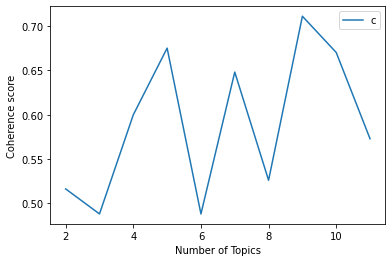

In [33]:
start, stop, step=2,12,1
plot_graph(clean_text,start,stop,step)
#for m, cv in zip(x, coherence_values_lsa):
 #   print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here
from lda2vec import preprocess, Corpus
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass


import pyLDAvis
pyLDAvis.enable_notebook()


npz = np.load(open('topics.pyldavis.npz', 'r'))
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()
# dat['term_frequency'] = dat['term_frequency'] * 1.0 / dat['term_frequency'].sum()
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    msg += ' '.join(top_words)
    print msg
    topic_to_topwords[j] = top_words

import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(dat['topic_term_dists'], dat['doc_topic_dists'], 
                                 dat['doc_lengths'] * 1.0, dat['vocab'], dat['term_frequency'] * 1.0, mds='tsne')

from sklearn.datasets import fetch_20newsgroups
remove=('headers', 'footers', 'quotes')
texts = fetch_20newsgroups(subset='train', remove=remove).data

msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
for topic_id, weight in enumerate(dat['doc_topic_dists'][1]):
    if weight > 0.01:
        text = ', '.join(topic_to_topwords[topic_id])
        print msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text)


plt.bar(np.arange(20), dat['doc_topic_dists'][1])



ModuleNotFoundError: ignored

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:

# Write your code here
from sklearn.datasets import fetch_20newsgroups
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)
freq = topic_model.get_topic_info(); freq.head(5)
freq = topic_model.get_topic_info(); freq.head(5)

topic_model.get_topic(0)  # Select the most frequent topic
topic_model.visualize_topics()
topic_model.visualize_term_rank()
opic_model.update_topics(docs, topics, n_gram_range=(1, 2))



ModuleNotFoundError: ignored

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

LDA (Latent Dirichlet Allocation) is a widely used topic modeling technique. It organizes text into relevant categories.
By calculating the likelihood of finding a word in a text and comparing it to the likelihood of finding a term in a comparable topic

After that, it assigns the topic. We can observe that the best number of topics is 18 using Gensim's LDA.

The LDA approach yielded a coherence score of 0.77.





LSA is a legal term that refers to (Latent Semantic Analysis)

Another important model for subject modeling. It decides the subjects by transforming the text into a single value equation with the help of SVD, and then analyzing the results.

All of the topics' cosine similarity is found. The main topic is chosen from among the topics with the highest cosine similarity.

We can see from the preceding data that the Coherence Value is 0.43 and the number of topics is 2.



When we compare the two results, we can observe that LDA has a greater coherence score than LSA.

LDA fits the text well for topic modeling since a greater coherence score indicates better alignment towards a theme.